# 문제정의
- 데이터 전처리 및 시각화 방법에 대해 학습

#  데이터 수집

In [1]:
import pandas as pd

# index_col : 인덱스 컬럼을 설정
train = pd.read_csv("./data/titanic_train.csv", index_col="PassengerId")
test = pd.read_csv("./data/titanic_test.csv", index_col="PassengerId")

# 탐색적 데이터 분석 및 전처리

In [2]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


- 분석 feature : Pclass, Age, Name, SibSp, Parch, Fare, Ticket, Cabin, Embarked
- 예측 target label : Survived
- feature
<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer
  <tr><td>Name<td>이름<td>호칭과 이름으로 구성<td>string
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>string
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>

## 탐색적 데이터 분석

- 데이터 이해 선행
- 결측치(컬럼에 값이 없는 데이터), 이상치(다른 값들과 차이가 큰 값), 오류가 있는지 확인
- 기술통계 
- 상관관계
- 시각화

## 결측치 확인

- info(), describe(), insull()과 sum() 함수 등을 이용

In [3]:
# 훈련 데이터의 결측치
train.info()

# Age, Cabin, Embarked에 결측치가 존재 
#(범주형 데이터의 개수가 적을때는 클래스의 수가 많은 곳으로 채운다) 
#수가 많다면 클래스 값의 비율대로 랜덤으로 입력한다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# 테스트 데이터의 결측치 확인
test.info()

#Age, Fare, Cabin에 결측치가 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- 결측치 채우는 방법
   - 수치형 경우
     - 기술통계(평균, 중간값)
     - 결측치가 적은 경우 : 전체 평균이나 중간값을 대입
     - 결측치가 많은 경우 결측치가 있는 데이터의 다른 컬럼과 같은 값을 갖는 데이터의 결측치 통계
     
   - 범주형인 경우
     - 결측치가 적은 경우 : 데이터수가 가장 많은 클래스로 할당 -> 기존 데이터가 결측치가 있는 데이터에 의해 영향을 덜 받기 때문
     - 결측치가 많은 경우 : 데이터수가 가장 많은 클래스로 할당 -> 편향이 됨 -> 기존 데이터의 개수 비율만큼 랜덤으로 할당

In [5]:
# 결측치 개수 확인 
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [7]:
train.describe()
#Fare는 이상하지는 않지만 왼쪽으로 편향되어있어서 정규화가 필요한것을 알수있음
#수치형과 범주형데이터에서 수치형데이터가 우선순위이다.

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# 등급별(Pclass) 통계 (평균)
# groupby() : 원하는 컬럼을 중심으로 그룹핑 해주는 함수
# Pclass 컬럼의 클래스별로 각 컬럼의 평균을 계산
train.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


- 1등실 생존율이 높았다.
- 나이를 보면 3등실에 나이가 적은 승객이 많았다.
- 1등실일수록 가족수가 적었다. 3등실일수록 가족수가 많았다.

In [10]:
train.groupby(["Pclass", "Survived"]).mean()

Age     SibSp     Parch       Fare
Pclass Survived                                          
1      0         43.695312  0.287500  0.300000  64.684007
       1         35.368197  0.492647  0.389706  95.608029
2      0         33.544444  0.319588  0.144330  19.412328
       1         25.901566  0.494253  0.643678  22.055700
3      0         26.555556  0.672043  0.384409  13.669364
       1         20.646118  0.436975  0.420168  13.694887

- 3등실 승객의 사망/생존자의 요금은 비슷하다
- 1등실 승객의 사망/생존자의 요금은 생존자의 요금이 더 비쌌다.
- 같은 등급의 객실에서 나이가 어릴수록 생존률이 높았다.

## Age 결측치 채우기

- 결측치가 있는 데이터의 다른 컬럼의 값과 같은 데이터의 평균값을 사용해서 결측치를 채움

- 그러면 어떤 컬럼을 참조할까요?
  - 결측치가 있는 컬럼(Age)와 상관관계가 높은 컬럼 선택(범주형)
  
- 피벗 테이블을 활용

- apply()을 이용하여 전체 데이터의 결측치를 채움
  - 데이터프레임의 데이터를 분리해서 원하는 처리를 수행한 후 다시 병합하는 함수 -> 재구조화 함수 (reconstruct function)

In [11]:
# Age 컬럼과 상관관계가 높은 컬럼찾기
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# 피벗 테이블 생성
# values : 결측치를 채울 컬럼
# index : 참고할 컬럼 목록 리스트
# aggfunc : 사용할 수학 도구 (평균, 중간값)
pt1 = train.pivot_table(values="Age",
                        index=["Pclass", "Sex"],
                        aggfunc = "mean")

pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [13]:
# 피벗 테이블에 접근하는 방법
pt1.loc[1, "male"]

Age    41.281386
Name: (1, male), dtype: float64

In [14]:
import numpy as np
# Age 컬럼의 결측치를 채우는 함수
def fill_age(row):
    # 한 줄 데이터에서 Age 컬럼이 결측치라면
    if np.isnan(row["Age"]):
        # 피벗 테이블을 참조 (같은 Pclass와 Sex인 값을 반환)
        return pt1.loc[row["Pclass"], row["Sex"]]
    # 결측치가 아닌경우
    else :
        return row["Age"]

In [15]:
# axis=1 : 한 줄 씩 넘긴다.
# astype("int64") : 나이는 실수가 없으니 정수로 변환
# apply는 pandas or numpy에서 사용자 정의 기능을 적용할때 사용
train["Age"] = train.apply(fill_age, axis=1).astype("int64")
test["Age"] = test.apply(fill_age, axis=1).astype("int64")

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [17]:
pt2 = test.pivot_table(values="Age",
                        index=["Pclass", "Sex"],
                        aggfunc = "mean")

pt2

Age
Pclass Sex              
1      female  41.040000
       male    40.561404
2      female  24.466667
       male    30.873016
3      female  22.430556
       male    24.979452

In [18]:
def fill_age(row):
    # 한 줄 데이터에서 Age 컬럼이 결측치라면
    if np.isnan(row["Age"]):
        # 피벗 테이블을 참조 (같은 Pclass와 Sex인 값을 반환)
        return pt2.loc[row["Pclass"], row["Sex"]]
    # 결측치가 아닌경우
    else :
        return row["Age"]

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


## train 데이터의 Embarked 결측치 채우기

In [20]:
# 가장 많은 데이터 수를 갖는 클래스(S)로 결측치를 할당
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train["Embarked"] = train["Embarked"].fillna("S")

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


## test 데이터의 결측치 채우기

In [23]:
test.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.520540,0.001087,0.018721,-0.577147
Age,-0.520540,1.000000,-0.084936,-0.062898,0.348593
SibSp,0.001087,-0.084936,1.000000,0.306895,0.171539
Parch,0.018721,-0.062898,0.306895,1.000000,0.230046
Fare,-0.577147,0.348593,0.171539,0.230046,1.000000


In [24]:
pt3 = test.pivot_table(values="Fare",
                        index=["Pclass", "Embarked"],
                        aggfunc = "mean")

pt3

Fare
Pclass Embarked            
1      C         110.073511
       Q          90.000000
       S          76.677504
2      C          20.120445
       Q          11.273950
       S          23.056090
3      C          10.658700
       Q           8.998985
       S          13.913030

In [25]:
# 결측치가 있는 데이터를 확인
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [26]:
def fill_age(row):
    if np.isnan(row["Fare"]):
        return pt3.loc[row["Pclass"], row["Embarked"]]
    else :
        return row["Fare"]

In [27]:
test["Fare"] = test.apply(fill_age, axis=1)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int64 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    object
 8   Cabin     91 non-null     object
 9   Embarked  418 non-null    object
dtypes: int64(4), object(6)
memory usage: 35.9+ KB


In [29]:
test.loc[1044]

Pclass                                                  3
Name                                   Storey, Mr. Thomas
Sex                                                  male
Age                                                    60
SibSp                                                   0
Parch                                                   0
Ticket                                               3701
Fare        Fare    13.91303
Name: (3, S), dtype: float64
Cabin                                                 NaN
Embarked                                                S
Name: 1044, dtype: object

In [30]:
# test["Fare"] = test["Fare"].fillna(float(pt2.loc[3, "S"]))

## Cabin 결측치 채우기
- 결측치가 실제 객실이 없는 승객이었을 가능성이 있으므로 원래값에 중복되지 않는 영문자로 채움
- 원래 객실번호의 첫번째 영문자만 추출

In [31]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
#결측치를 M으로 채움
train["Cabin"] = train["Cabin"].fillna("M")
test["Cabin"] = test["Cabin"].fillna("M")

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int64 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    object
 8   Cabin     418 non-null    object
 9   Embarked  418 non-null    object
dtypes: int64(4), object(6)
memory usage: 52.1+ KB


In [35]:
# 원래 객실번호의 첫번째 영문자 추출
train["Cabin"] = train["Cabin"].str[0]
test["Cabin"] = test["Cabin"].str[0]

In [36]:
train["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

## 데이터 시각화 하기

- test데이터를 활용하지 않고 train데이터를 이용해서 시각화/탐색하는게 좋다.


### 범주형 데이턱 시각화
- 빈도기반의 bar chart를 많이 활용

In [37]:
# matplotlib기반의 데이터 시각화 라이브러리
import seaborn as sns

#### Cabin시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

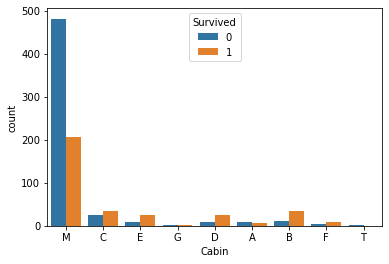

In [38]:
sns.countplot(data=train, #사용할 데이터 지정
              x = "Cabin", # x축에서 번주로 사용할 컬럼 지정
              hue = 'Survived') # 각 범주를 분리할 컬럼 지정

- B,D 같은 경우는 살아남기에 괜찮은 객실일 수 있다.
- M 같은 경우는 죽은 사람들의 비율이 엄청 높다.

#### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

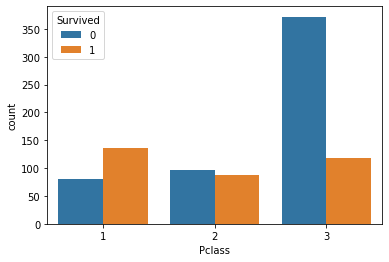

In [39]:
sns.countplot(data=train, x="Pclass", hue = "Survived")

#### Cabin&Pclass 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

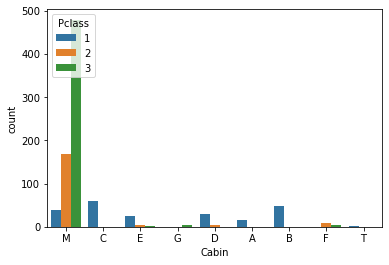

In [40]:
sns.countplot(data=train,
              x = "Cabin", 
              hue = 'Pclass') 


- M에는 3등급이 많이 있어서 죽은 사람의 비율이 높아보인거 같다.
- M이 생존여부 판단에는 도움이 덜 될 수 있겠다.

### 수치형 데이터 시각화
- 구간을 나눠서 종합하는 히스토그램
- 커널밀도 추정 그래프

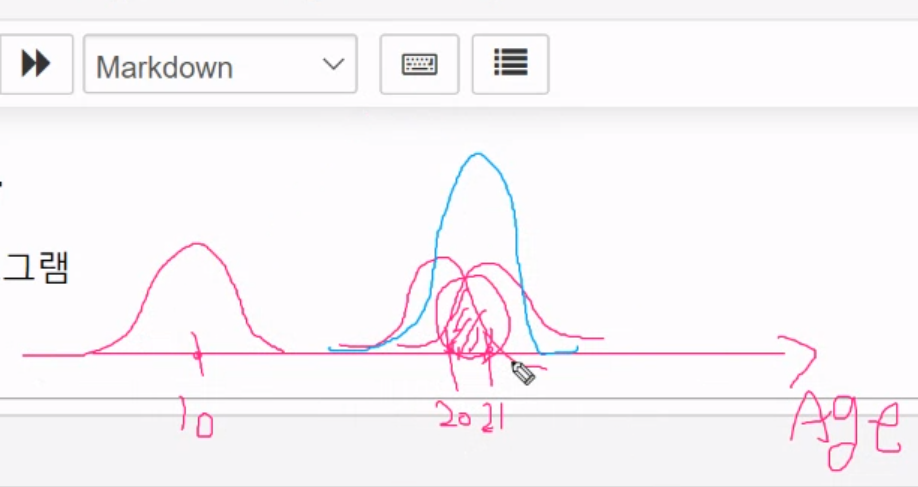

In [41]:
import matplotlib.pyplot as plt

#### matplotlib hist 함수

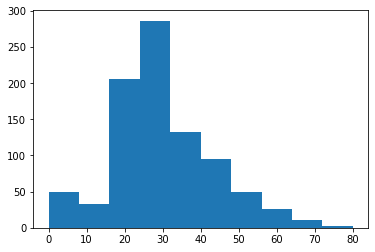

In [42]:
plt.hist(train['Age'], bins=10)
plt.show()

#### seaborn histplot  함수

<AxesSubplot:xlabel='Age', ylabel='Count'>

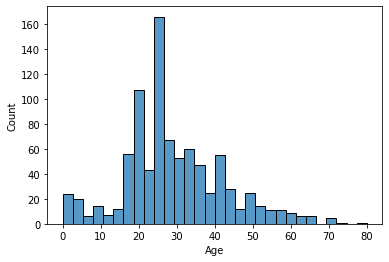

In [43]:
# https://seaborn.pydata.org/examples/index.html
sns.histplot(data=train, x=train['Age'], bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

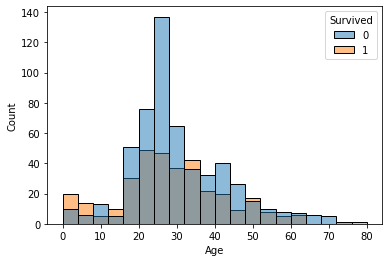

In [44]:
sns.histplot(data=train, x=train['Age'], bins=20, hue='Survived')

- 25대 중~후반의 사람들이 죽은 비율이 높다.
- 10살 미만의 사람들이 생존 비율이 약간 높다.
   - 패턴을 보이니 학습시켰을 때 괜찮겠다.

#### 커널밀도추정 그래프

<AxesSubplot:xlabel='Fare', ylabel='Density'>

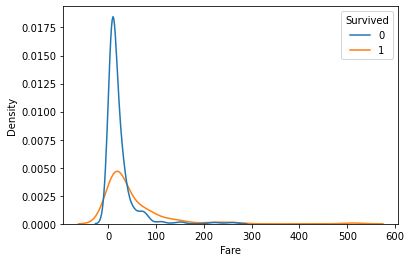

In [45]:
sns.kdeplot(data=train, x=train['Fare'], hue='Survived')

- 0~40달러 사이의 사람은 죽은 사람의 밀도가 높다.
- 200달러 이상의 사람은 생존의 밀도가 아주 살짝높다.

#### 바이올린플롯 그래프 시각화
- 박스 + KDE 그래프

<AxesSubplot:xlabel='Sex', ylabel='Age'>

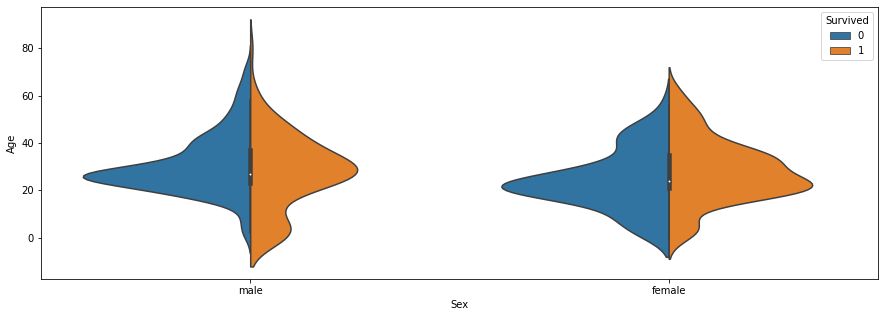

In [46]:
plt.figure(figsize=(15,5)) #그림의 가로,세로 크기 설정
sns.violinplot(data=train, # 사용할 데이터
              x = 'Sex',
              y = 'Age',
              hue='Survived',
              split=True) # 떨어져있던거 붙여서 보기쉽게해준다.

### 텍스트 데이터
- 비정형 데이터는 단어중심 시각화
- wordcloud
- 빈도기반의 시각화 활용기능

# 특성공학
- feature에서 유의미한 컬럼을 추출하거나 병합하는 행위

In [47]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 가족 컬럼을 만들어보자.
- SibSp와 Parch를 병합하자

<AxesSubplot:xlabel='SibSp', ylabel='count'>

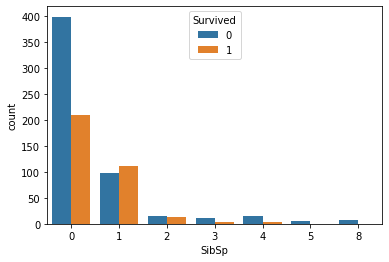

In [48]:
sns.countplot(data=train,
             x='SibSp',
             hue = 'Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

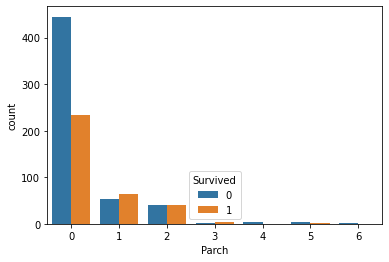

In [49]:
sns.countplot(data=train,
             x='Parch',
             hue = 'Survived')

In [50]:
# SibSp와 Parch의 컬럼을 합쳐 새로운 Family라는 새로운 컬럼을 생성
train['Family'] = train['SibSp'] + train['Parch']

<AxesSubplot:xlabel='Family', ylabel='count'>

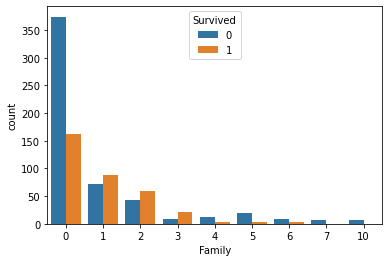

In [51]:
sns.countplot(data=train,
             x='Family',
             hue = 'Survived')

### Cut함수를 이용한 Binning(수치 -> 범주)
- 사소한 관찰 오류를 줄여줄 수 있다.(모델의 단순화를 유도)

In [52]:
bins = [-1,0,3,20] #데이터를 잘라낼 구간정보 설정 (0구간, 1~3구간, 4~20구간)
labels = ['Alone', ' Small', 'Large'] #구간별 범주 이름
cut_result = pd.cut(x=train['Family'],# 구간화할 데이터설정
                   bins=bins, # 잘라낼 구간정보 설정
                   labels=labels) #구간별 범주 이름 설정

In [53]:
cut_result

PassengerId
1       Small
2       Small
3       Alone
4       Small
5       Alone
        ...  
887     Alone
888     Alone
889     Small
890     Alone
891     Alone
Name: Family, Length: 891, dtype: category
Categories (3, object): ['Alone' < ' Small' < 'Large']

In [54]:
train['Family_cat'] = cut_result

<AxesSubplot:xlabel='Family_cat', ylabel='count'>

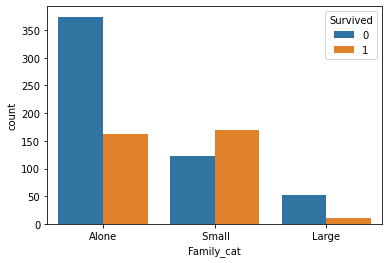

In [55]:
sns.countplot(data=train,
             x='Family_cat',
             hue='Survived')

In [56]:
test['Family'] = test['SibSp'] + test['Parch']
bins = [-1,0,3,20] 
labels = ['Alone', ' Small', 'Large']
cut_result = pd.cut(x=test['Family'],
                   bins=bins,
                   labels=labels) 

In [57]:
test['Family_cat'] = cut_result

## 비정형 데이터 다루기(Name)
- 이름 중간에 호칭을 추출해서 사용해보자

In [58]:
train['Name']  #train의 Name데이터는 Series데이터 형식이다.

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [59]:
def split_title(row):
    return row.split(",")[1].split(".")[0].strip() #한줄씩 들어오면 한줄씩 실행시켜준다. strip() 공백제거

In [60]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

### countplot 시각화

<AxesSubplot:xlabel='Title', ylabel='count'>

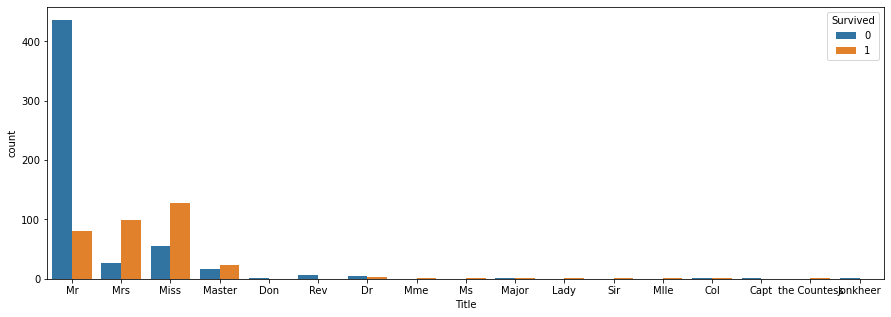

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(data=train,
             x='Title',
             hue='Survived')

- 일부 수치가 적은 호칭을 Other로 통일하자.
- Mr. Mrs, Miss, Master, Rev, Other

In [62]:
# map 합수 이용하기(데이터 치환시 사용) 결측치를 NaN으로 표시해준다
title_dic= {
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Rev":"Rev"
}

In [63]:
title_mapping = train['Title'].map(title_dic)
title_mapping[title_mapping.isnull()]

PassengerId
31     NaN
246    NaN
318    NaN
370    NaN
399    NaN
444    NaN
450    NaN
537    NaN
557    NaN
600    NaN
633    NaN
642    NaN
648    NaN
661    NaN
695    NaN
711    NaN
746    NaN
760    NaN
767    NaN
797    NaN
823    NaN
Name: Title, dtype: object

In [64]:
train['Title'] = title_mapping.fillna("Other")

In [65]:
#test 적용
title_mapping = test['Title'].map(title_dic)
test['Title'] = title_mapping.fillna("Other")

In [66]:
print(train['Title'].unique())
print(test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev']
['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev']


### 사용하지 않을 컬럼 정리

In [67]:
train.columns  #Name, SibSp, Parch, Ticket 제거

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat', 'Title'],
      dtype='object')

In [68]:
test.columns  # 트레인과 동일하게 진행

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family', 'Family_cat', 'Title'],
      dtype='object')

In [69]:
train.drop(['Name','SibSp','Parch','Ticket'], axis=1, inplace=True)

In [70]:
test.drop(['Name','SibSp','Parch','Ticket'], axis=1, inplace=True)

In [71]:
print("train columns :",train.columns)
print("test columns :",test.columns)

train columns : Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Family_cat', 'Title'],
      dtype='object')
test columns : Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family',
       'Family_cat', 'Title'],
      dtype='object')


# 모델링
- 인코딩(문자형태의 데이터를 숫자형태로 변환)
   1. label encoding
   2. one-hot encoding
- 특성선택(feature selection)
- 모델선택 및 하이퍼파라미터 튜닝
- 모델학습 및 평가

## 인코딩

In [72]:
# 인코딩을 해주는 컬럼의 순서가 있는지 생각한다. ex)순서가 있다면 라벨인코딩 없다면 원핫인코딩
train.columns  #인코딩을 해줘야하는 컬럼(Sex, Cabin, Embarked, Family_cat, Title)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Family_cat', 'Title'],
      dtype='object')

In [73]:
# 인코딩할 컬럼명만 선택
categorical_features = ['Sex', 'Cabin', 'Embarked', 'Family_cat', 'Title']

In [74]:
#pd.get_dummies(train['Sex'])

In [75]:
# 반복문으로 인코딩하기, prefix = () 인코딩할때 컬럼에서 중복된 키워드가 있을때 쓰는것
for feature_name in categorical_features :
    one_hot = pd.get_dummies(train[feature_name], prefix=feature_name)
    train = pd.concat([train, one_hot], axis=1) # 기존데이터 끝에 one_hot을 붙임
    train.drop(feature_name, axis=1,inplace=True) #기존 글자 컬럼을 삭제

In [76]:
train.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Embarked_S,Family_cat_Alone,Family_cat_ Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22,7.2500,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,1,1,38,71.2833,1,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,3,26,7.9250,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,1,1,35,53.1000,1,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
5,0,3,35,8.0500,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [77]:
# 테스트 데이터도 동일하게 진행
for feature_name in categorical_features :
    one_hot = pd.get_dummies(test[feature_name], prefix=feature_name)
    test = pd.concat([test, one_hot], axis=1)
    test.drop(feature_name, axis=1,inplace=True)

In [78]:
test.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_S,Family_cat_Alone,Family_cat_ Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
893,3,47,7.0,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,9.6875,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
895,3,27,8.6625,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,12.2875,2,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [79]:
train.shape, test.shape

((891, 28), (418, 26))

In [80]:
# 집합연산으로 다른 컬럼을 확인해보자.(집합은 중괄호안에 데이터만 들어있음)
# 차집합 구할때 set() - set()
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [81]:
# train data는 Cabin_T가 존재했지만
# test data는 Cabin_T가 없어서  one-hot 인코딩시 컬럼이 안만들어졌다.
# test data 끝에 Cabin_T 를 추가하자
test['Cabin_T'] = 0

In [82]:
test.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Family_cat_Alone,Family_cat_ Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
893,3,47,7.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
894,2,62,9.6875,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
895,3,27,8.6625,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
896,3,22,12.2875,2,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [83]:
# 훈련데이터와 테스트 데이터의 인덱스 순서가 다르기때문에 정렬해주자.
train.sort_index(axis=1, inplace=True)
test.sort_index(axis=1, inplace=True)

In [84]:
train.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cat_ Small', 'Family_cat_Alone',
       'Family_cat_Large', 'Fare', 'Pclass', 'Sex_female', 'Sex_male',
       'Survived', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Title_Rev'],
      dtype='object')

In [85]:
test.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cat_ Small', 'Family_cat_Alone',
       'Family_cat_Large', 'Fare', 'Pclass', 'Sex_female', 'Sex_male',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev'],
      dtype='object')

## 특성선택
- 예측결과에 영향을 줄 특성들을 골라본다.
- Family와 Family_cat이 비슷한 특서이기 때문에 선택해보자.

### 문제와 답 만들기

In [86]:
X_train = train.drop(['Survived', 'Family'], axis =1)
y_train = train.Survived # pandas 지원기능 컬럼이 하나이면 train.Survived == train['Survived']
X_test = test.drop('Family', axis=1)

In [87]:
X_train.shape, y_train.shape

((891, 26), (891,))

In [88]:
X_test.shape

(418, 26)

## 학습
- KNN모델과 DecisionTree모델 활용

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
# 모델 생성
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [91]:
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
# 모델 예측
knn_pre = knn_model.predict(X_test)
tree_pre = tree_model.predict(X_test)

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pre = tree_model.predict(X_test)
submission['Survived'] = tree_pre
submission.to_csv("./data/tree_pre.scv", index=False)

In [93]:
# 정답파일만들기
submission = pd.read_csv('./data/gender_submission.csv')

In [94]:
submission.head()
submission['Survived'] = tree_pre
submission.to_csv("./data/tree_pre.scv", index=False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [95]:
submission['Survived'] = knn_pre

In [96]:
# 데이터프레이미을 csv파일로 저장
#  index=False을 쓰지 않느다면 맨 앞의 번호도 인덱스로 인식해서 저장된다.
submission.to_csv("./data/knn_pre.scv", index=False)

In [97]:
submission['Survived'] = tree_pre
submission.to_csv("./data/tree_pre.scv", index=False)

### 데이터 스케일링
- 각 feature의 스케일이 다르면 예측결과가 안좋은 경우가 있다.
- KNN, SVM 신경망모델, Clustering 모델 등

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
# 스케일러 생성(평균과 표준편차)
std_scaler = StandardScaler()

In [100]:
# 기준값 생성(평균, 표준편차)
std_scaler.fit(X_train[['Fare']])

StandardScaler()

In [101]:
#데이터 변형 ([[]] 2차원 데이터 프레임으로 결과도출하기 위해서 씀)
scaled_fare = std_scaler.transform(X_train[['Fare']])

In [102]:
scaled_fare

array([[-5.02445171e-01],
       [ 7.86845294e-01],
       [-4.88854258e-01],
       [ 4.20730236e-01],
       [-4.86337422e-01],
       [-4.78116429e-01],
       [ 3.95813561e-01],
       [-2.24083121e-01],
       [-4.24256141e-01],
       [-4.29555021e-02],
       [-3.12172378e-01],
       [-1.13845709e-01],
       [-4.86337422e-01],
       [-1.87093118e-02],
       [-4.90279793e-01],
       [-3.26266659e-01],
       [-6.19988892e-02],
       [-3.86670720e-01],
       [-2.85997284e-01],
       [-5.02948539e-01],
       [-1.24919787e-01],
       [-3.86670720e-01],
       [-4.86756223e-01],
       [ 6.63597416e-02],
       [-2.24083121e-01],
       [-1.64441595e-02],
       [-5.02948539e-01],
       [ 4.64700108e+00],
       [-4.89776426e-01],
       [-4.89442190e-01],
       [-9.02720170e-02],
       [ 2.30172882e+00],
       [-4.92377828e-01],
       [-4.37007438e-01],
       [ 1.00606170e+00],
       [ 3.98582080e-01],
       [-5.02863973e-01],
       [-4.86337422e-01],
       [-2.8

<AxesSubplot:xlabel='Fare', ylabel='Density'>

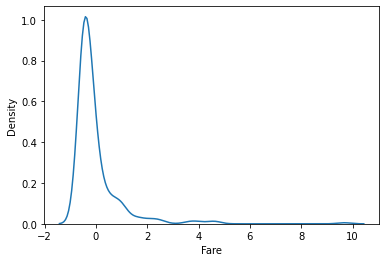

In [103]:
X_train['Fare'] = scaled_fare
sns.kdeplot(data=X_train, x='Fare')

In [104]:
scaled_fare = std_scaler.transform(X_test[['Fare']])
X_test['Fare'] = scaled_fare

In [105]:
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train,y_train)
knn_pre2 = knn_model2.predict(X_test)
submission['Survived'] = knn_pre2
submission.to_csv("./data/knn_pre2", index=False)

## 하이퍼 파라미터 튜닝
- KNN모델과 DecisionTree모델을 최적화해보자.
- KNN : 이웃숫자
- Tree : 나무의 깊이, 리프노드의 갯수, 한 리프노드에 들어갈 샘풀 수 등

### 모델 최적화를 위해 검증 데이터셋을 만들자

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train2,X_val,y_train2,y_val = train_test_split(X_train, y_train,
                                                test_size=0.3,
                                                random_state=719)

In [108]:
X_train2.shape, y_train2.shape

((623, 26), (623,))

In [109]:
X_val.shape, y_val.shape

((268, 26), (268,))

In [ ]:
X_train2,X_val,y_train2,y_val

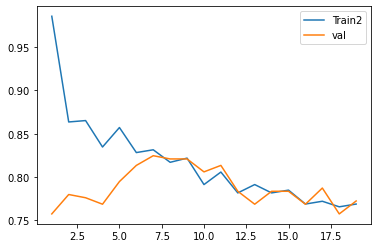

In [111]:
train_acc = []
test_acc = []

neighbor =range(1, 20)

for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train2, y_train2)
    
    train_acc.append(knn_model.score(X_train2, y_train2))
    test_acc.append(knn_model.score(X_val, y_val))
import matplotlib.pyplot as plt

plt.plot(neighbor, train_acc, label="Train2")
plt.plot(neighbor, test_acc, label="val")
plt.legend()
plt.show()

In [115]:
knn_model3 = KNeighborsClassifier(n_neighbors=7)
knn_model3.fit(X_train, y_train)
knn_pre3 = knn_model3.predict(X_test)
submission['Survived'] = knn_pre3
submission.to_csv("./data/knn_pre3.csv", index=False)

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pre2 = tree_model.predict(X_test)
submission['Survived'] = tree_pre2
submission.to_csv("./data/tree_pre.scv", index=False)